Multiple_Linear_Regression

In [2]:
import pandas as pd
import numpy as np

In [29]:
dataset = pd.read_csv('kc_house_data.csv')
#https://www.kaggle.com/datasets/shivachandel/kc-house-data#
dataset = dataset.drop('date', axis=1)
dataset = dataset.drop('id', axis=1)

dataset


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


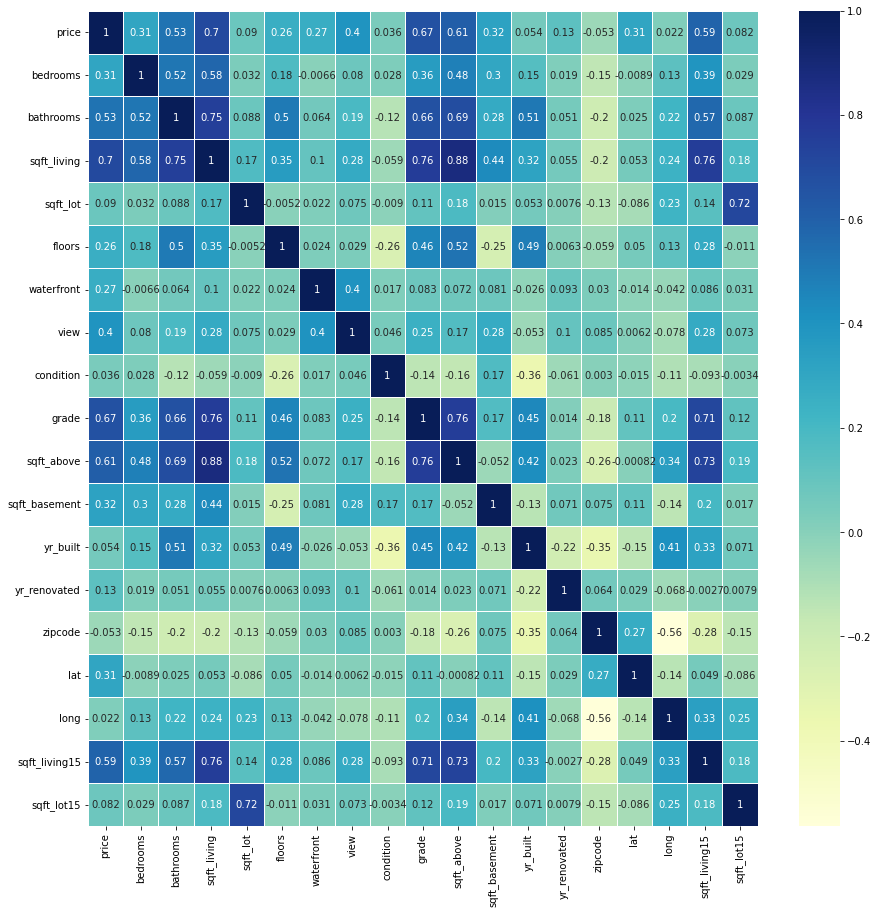

In [30]:
# Correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dataset.corr(), cmap = "YlGnBu", annot = True, linewidths=.5, ax=ax)
plt.show()

In [31]:
ohe_df = pd.get_dummies(dataset)
ohe_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [32]:
ohe_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [33]:
# Define X and y 
y=ohe_df[['price']]
X=ohe_df.drop(['price']
          ,axis=1)

In [34]:
# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                                shuffle=False, random_state=2)

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = regressor.predict(X_test)
y_pred

array([[678844.66978338],
       [678844.66978338],
       [316906.51667245],
       ...,
       [107870.92074046],
       [360686.45256026],
       [110865.05283179]])

In [38]:
intercept = regressor.intercept_
koefisien = regressor.coef_
print(intercept)
print(koefisien)

[11836332.32264203]
[[-3.39679112e+04  4.09513566e+04  1.08176103e+02  1.50042181e-01
  -8.57023413e+02  5.94541283e+05  5.21325064e+04  2.73430448e+04
   9.06339579e+04  7.32085991e+01  3.49675041e+01 -2.92310294e+03
   2.06021675e+01 -5.89671754e+02  5.82285879e+05 -1.91371357e+05
   3.61416693e+01 -4.41271499e-01]]


In [37]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
#print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
#print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  131275.0952232879


In [12]:
regressor.score(X_train, y_train)

0.7009379400978142

C:\Users\Nisarg\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


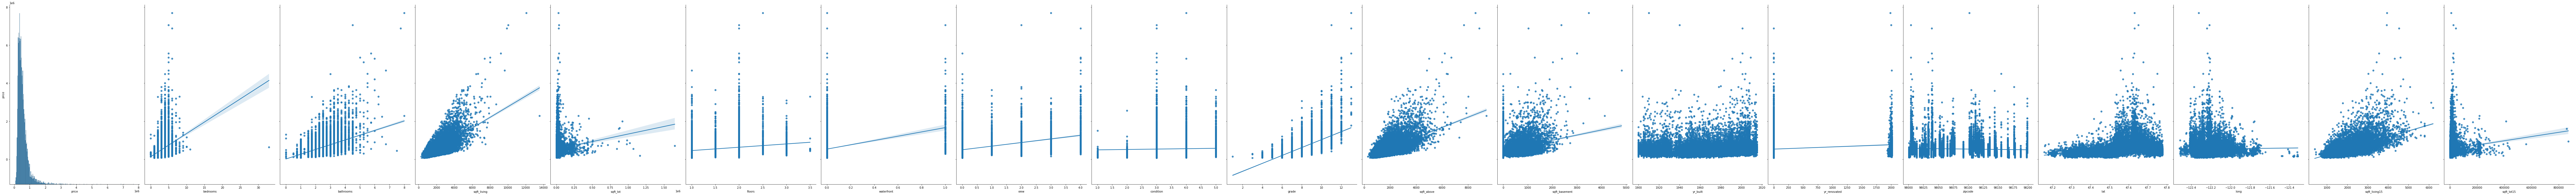

In [13]:
import seaborn as sns
sns.pairplot(ohe_df, x_vars=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], y_vars='price', size=10, aspect=0.7, kind='reg')